In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("superstore.csv", encoding='iso-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [3]:
df = df.drop('Postal Code', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51290 non-null  object 
 17  Sales           51290 non-null 

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [6]:
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [7]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

<AxesSubplot:>

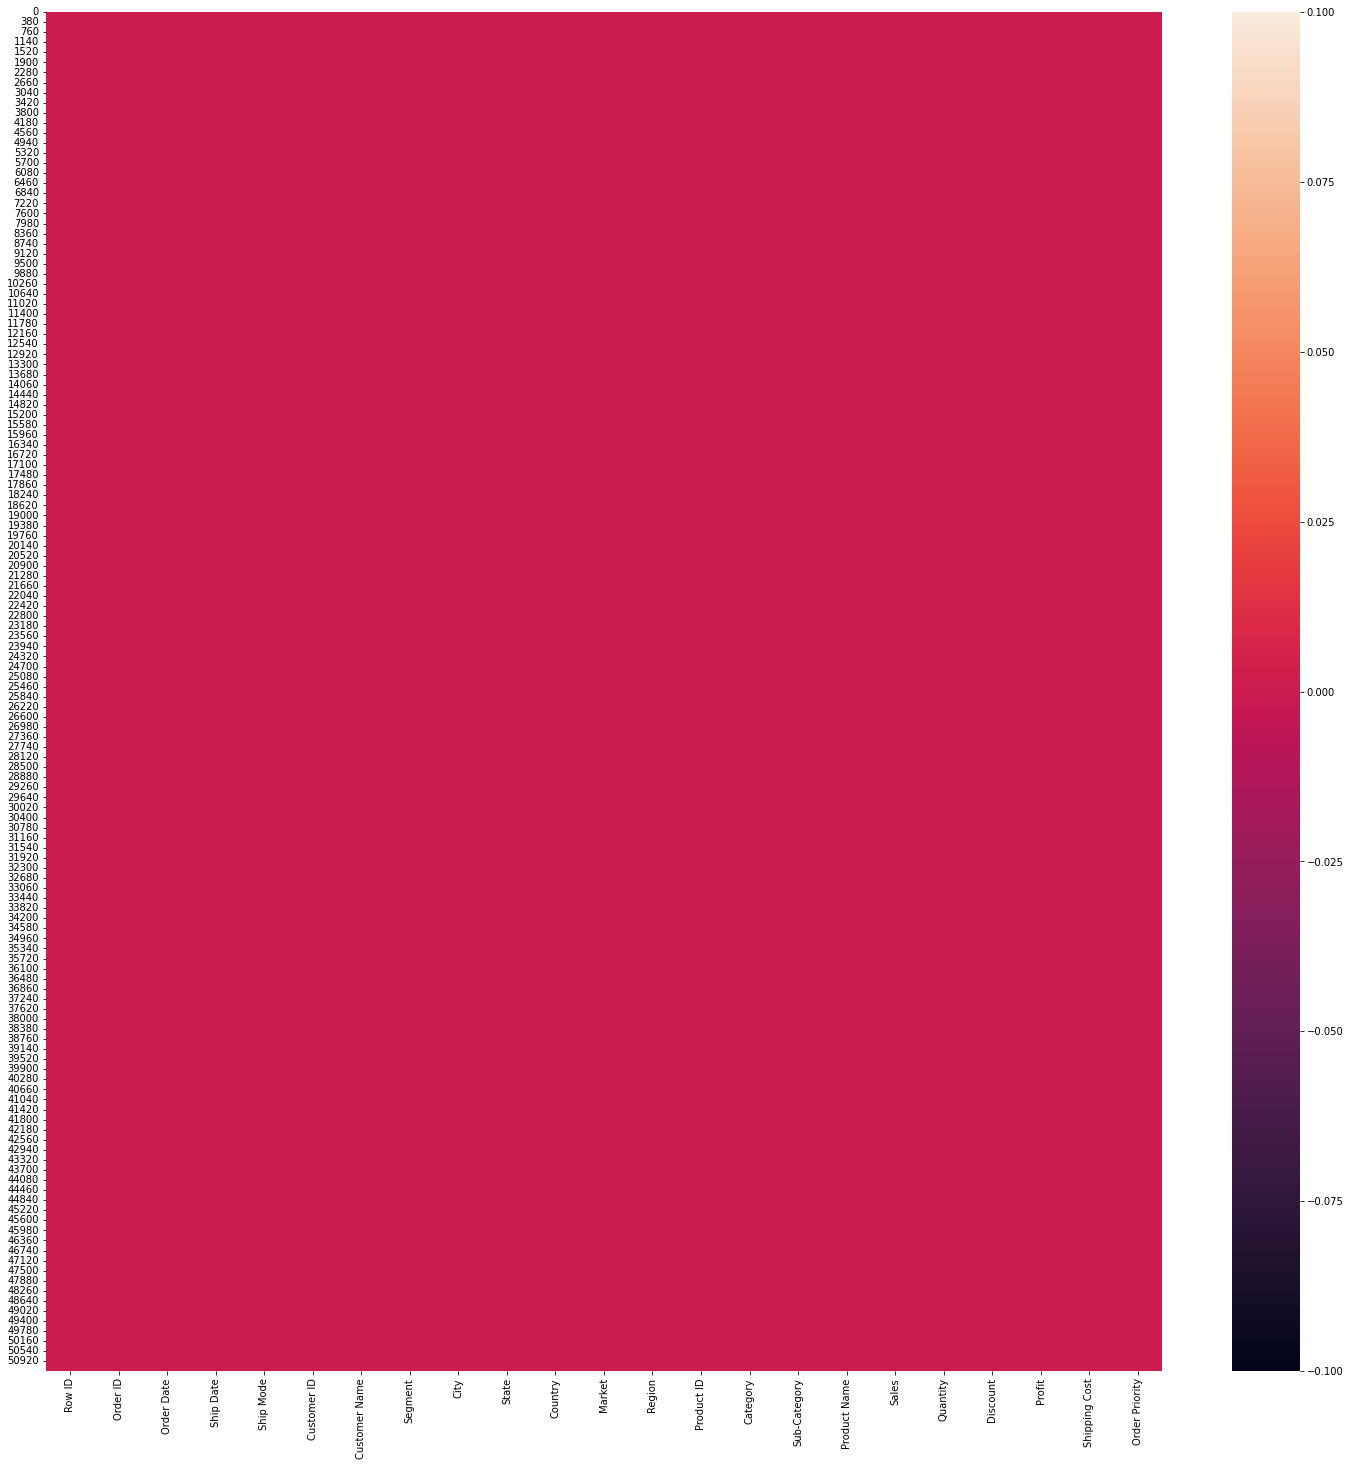

In [8]:
plt.figure(figsize = (25, 25))
sns.heatmap(df.isnull())

In [9]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [10]:
df.select_dtypes(include=['object']).columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Order Priority'],
      dtype='object')

In [11]:
df.select_dtypes(include=['datetime64[ns]']).columns

Index(['Order Date', 'Ship Date'], dtype='object')

# Basic Exploratory data analysis

##  What are the total sales and profits for the store for each year in the datasets?


In [12]:
# What are the total sales and profits for the store for each year in the datasets?

# create new columns (year)
df['year'] = df['Order Date'].dt.year
#df.head()
#Calculate the total sales for each year?
sales_by_year = df.groupby('year')['Sales'].sum()
#sales_by_year
#calculate the total shipping cost of the year?
shipping_cost_year = df.groupby('year')['Shipping Cost'].sum()
#shipping_cost_year

# calculate the total profits for each year?
profits_by_year = sales_by_year - shipping_cost_year
profits_by_year

year
2011    2.015180e+06
2012    2.393947e+06
2013    3.041196e+06
2014    3.839358e+06
dtype: float64

## What are the top-selling products in terms of revenue and quantity sold?

In [13]:
# What are the top-selling products in terms of revenue and quantity sold?
product_sales = df.groupby('Product Name').agg({'Sales': 'sum',
                                               'Quantity': 'sum'})

#product_sales.sort_values(by='Sales', ascending=False).head(10)
product_sales.sort_values(by='Quantity', ascending=False).head(10)

,Sales,Quantity
Product Name,,
Staples,7008.2000,876
"Cardinal Index Tab, Clear",1922.8302,337
"Eldon File Cart, Single Width",34387.7287,321
"Rogers File Cart, Single Width",29466.3053,262
"Sanford Pencil Sharpener, Water Color",5581.9741,259
"Stockwell Paper Clips, Assorted Sizes",2395.4378,253
"Avery Index Tab, Clear",1312.9488,252
"Ibico Index Tab, Clear",1807.1811,251
"Smead File Cart, Single Width",25397.1708,250


## What are the top product categories in terms of revenue and quantity sold? 

In [14]:
#What are the top product categories in terms of revenue and quantity sold?
category_sales = df.groupby('Category').agg({'Sales': 'sum',
                                               'Quantity': 'sum'})
#category_sales.sort_values(by='Sales', ascending=False).head(10)
category_sales.sort_values(by='Quantity', ascending=False).head(10)

,Sales,Quantity
Category,,
Office Supplies,3.787070e+06,108182
Technology,4.744557e+06,35176
Furniture,4.110874e+06,34954


## what is the average order value and how does it vary by product category?

In [15]:
# what is the average order value and how does it vary by product category?
order_revenue = df.groupby('Order ID')['Sales'].sum()
avg_order_value = order_revenue.mean()

# calculated the avg order value by product category
category_avg_order_value = df.groupby('Category')['Sales'].mean()

print("Average Order Value: ${:.2f}".format(avg_order_value))
print("\nAverage Order Value by Product Category: ")
print(category_avg_order_value)

Average Order Value: $504.99

Average Order Value by Product Category: 
Category
Furniture          416.248905
Office Supplies    121.097120
Technology         467.858939
Name: Sales, dtype: float64


## Who are the top customers in terms of total spending and number of orders?

In [16]:
#Who are the top customers in terms of total spending and number of orders?

customer_spending = df.groupby("Customer Name")["Sales"].sum()
top_customers_by_spending = customer_spending.sort_values(ascending=False).head(3)
customer_orders = df.groupby("Customer Name")["Order ID"].nunique()
top_customers_by_orders = customer_orders.sort_values(ascending=False).head(3)

print("Top 3 Customers by total spending:")
print(top_customers_by_spending)
print("\nTop 3 Customers by Number of Orders:")
print(top_customers_by_orders)

Top 3 Customers by total spending:
Customer Name
Tom Ashbrook    40488.07080
Tamara Chand    37457.33300
Greg Tran       35550.95428
Name: Sales, dtype: float64

Top 3 Customers by Number of Orders:
Customer Name
Frank Olsen      47
Anna Andreadi    47
Michael Paige    47
Name: Order ID, dtype: int64


## How does sales performance vary across different regions or states?

In [17]:
#How does sales performance vary across different regions or states?
region_sales = df.groupby("Region")["Sales"].sum()
state_sales = df.groupby('State')['Sales'].sum()

top_region_sales = region_sales.sort_values(ascending=False)
top_state_sales = state_sales.sort_values(ascending=False).head(10)

print("Total sales by region:")
print(top_region_sales)
print("\nTotal sales by states:")
print(top_state_sales)

Total sales by region:
Region
Central           2.822303e+06
South             1.600907e+06
North             1.248166e+06
Oceania           1.100185e+06
Southeast Asia    8.844232e+05
North Asia        8.483098e+05
EMEA              8.061613e+05
Africa            7.837732e+05
Central Asia      7.528266e+05
West              7.254578e+05
East              6.787812e+05
Caribbean         3.242809e+05
Canada            6.692817e+04
Name: Sales, dtype: float64

Total sales by states:
State
England                   485170.9710
California                457687.6315
Ile-de-France             317822.5440
New York                  310876.2710
New South Wales           270487.1040
Queensland                238312.7340
North Rhine-Westphalia    216451.8510
Texas                     170188.0458
San Salvador              153639.3970
National Capital          152175.3555
Name: Sales, dtype: float64


## How do sales trends vary across different time periods (e.g., months, quarters, years)?

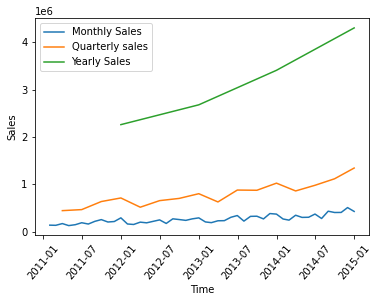

In [18]:
#How do sales trends vary across different time periods (e.g., months, quarters, years)?
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()
quarterly_sales = df.groupby(pd.Grouper(key='Order Date', freq='Q'))['Sales'].sum()
yearly_sales = df.groupby(pd.Grouper(key='Order Date', freq='Y'))['Sales'].sum()

#plot the sales trends over time
plt.plot(monthly_sales, label='Monthly Sales')
plt.plot(quarterly_sales, label = 'Quarterly sales')
plt.plot(yearly_sales, label = "Yearly Sales")
plt.xticks(rotation = 50)
plt.xlabel('Time')
plt.ylabel("Sales")
plt.legend()
plt.show()

## Can we use the data to forecast future sales and identify potential growth opportunities for the business?

In [20]:
from statsmodels.tsa.arima.model import ARIMA

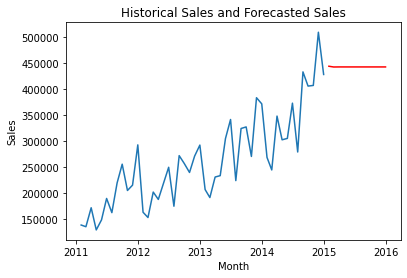

In [21]:
# Create a new DataFrame for sales data by month
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M')).sum()

# Fit an ARIMA model to the monthly sales data
model = ARIMA(monthly_sales['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Generate forecasted sales data for the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the historical sales data and forecasted sales data
plt.plot(monthly_sales.index, monthly_sales['Sales'])
plt.plot(forecast.index, forecast, color='red')
plt.title('Historical Sales and Forecasted Sales')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.show()

# Data visualization 

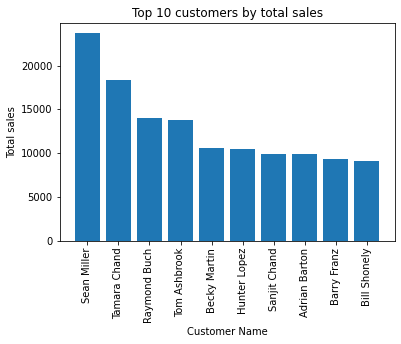

      Customer Name Order Date        Region         Category    Sales
336    Becky Martin 2011-01-12         South  Office Supplies    57.12
339    Becky Martin 2011-01-12         South  Office Supplies    38.68
393    Hunter Lopez 2011-02-04  Central Asia       Technology  1278.00
397    Hunter Lopez 2011-02-04  Central Asia       Technology  3195.00
404    Hunter Lopez 2011-02-04  Central Asia  Office Supplies   149.58
...             ...        ...           ...              ...      ...
51237  Bill Shonely 2014-12-31  Central Asia  Office Supplies   258.12
51245  Bill Shonely 2014-12-31  Central Asia       Technology   276.60
51269  Bill Shonely 2014-12-31  Central Asia        Furniture   364.59
51271  Bill Shonely 2014-12-31  Central Asia  Office Supplies    72.00
51276  Bill Shonely 2014-12-31  Central Asia  Office Supplies    39.42

[703 rows x 5 columns]


In [22]:
# Top customers by sales

# group the data by customers name and location and calculated total sales

customer_sales = df.groupby(['Customer Name', 'Segment', 'City', 'State']).agg({
                                                            'Sales': 'sum'
                                                                         }).reset_index()
#print(customer_sales)
# sort results by sales

customer_sales = customer_sales.sort_values(by = 'Sales', ascending = False)
#print(customer_sales)

# Creating bar chart showing top 10 customers by total sales

top_10 = customer_sales.head(10)
plt.bar(top_10['Customer Name'], top_10['Sales'])
plt.xticks(rotation=90) # for x axis 90 degeree
plt.xlabel("Customer Name")
plt.ylabel("Total sales")
plt.title("Top 10 customers by total sales")
plt.show()

# Display the order history for the top 10 customers

top_10_history = df[df['Customer Name'].isin(top_10['Customer Name'])]
print(top_10_history[['Customer Name', 'Order Date', 'Region', 'Category', 'Sales']])

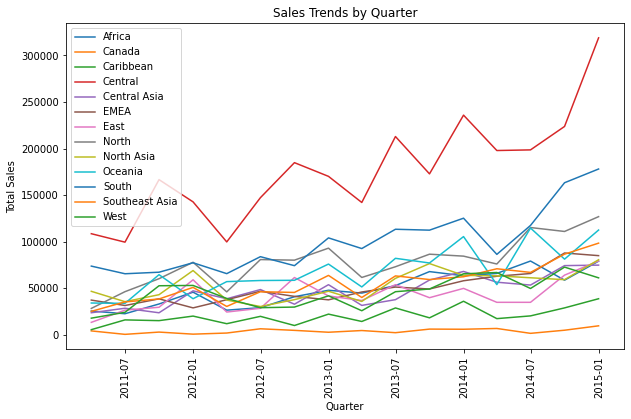

In [30]:
# Group the data by quarter and region or category
sales_by_quarter = df.groupby([pd.Grouper(key='Order Date', freq='Q'), 'Region'])['Sales'].agg('sum').reset_index()
# Or, we can group the data by quarter and category
# sales_by_quarter = data.groupby([pd.Grouper(key='Order Date', freq='Q'), 'Category'])['Sales'].agg('sum').reset_index()

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 6))
for region in sales_by_quarter['Region'].unique():
    ax.plot(sales_by_quarter[sales_by_quarter['Region']==region]['Order Date'],
            sales_by_quarter[sales_by_quarter['Region']==region]['Sales'],
            label=region)
plt.xticks(rotation=90)   
ax.set_xlabel('Quarter')
ax.set_ylabel('Total Sales')
ax.set_title('Sales Trends by Quarter')
ax.legend()
plt.show()

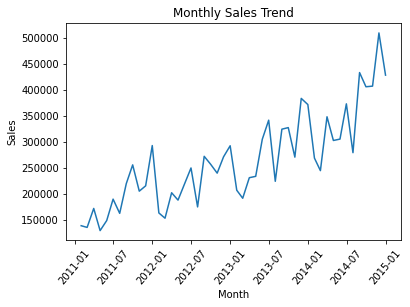

In [23]:
# Get monthly sales data
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales': 'sum'})

# Plot monthly sales trend
plt.plot(monthly_sales.index, monthly_sales['Sales'])
plt.xticks(rotation=50)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

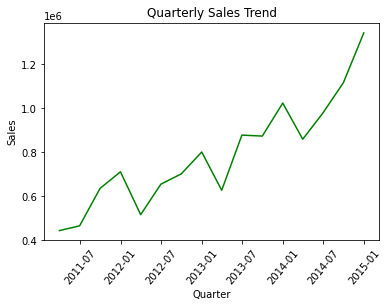

In [24]:
#quaterly sales trend
quarterly_sales = df.groupby(pd.Grouper(key='Order Date', freq='Q')).agg({'Sales': 'sum'})
# Plot quarterly sales trend
plt.plot(quarterly_sales.index, quarterly_sales['Sales'], color = 'green')
plt.xticks(rotation=50)
plt.title("Quarterly Sales Trend")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.show()

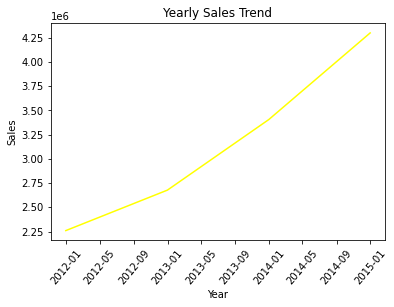

In [25]:
# yearly sales treand
yearly_sales = df.groupby(pd.Grouper(key='Order Date', freq='Y')).agg({'Sales':'sum'})
# Plot yearly sales trend
plt.plot(yearly_sales.index, yearly_sales['Sales'], color = 'yellow')
plt.xticks(rotation=50)
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

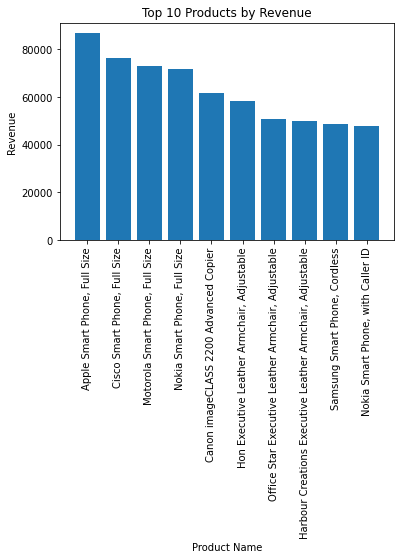

In [26]:
# Get top 10 products by revenue
top_products = df.groupby(['Product Name'])['Sales'].sum().reset_index().sort_values('Sales', ascending=False)[:10]

# Plot top 10 products by revenue
plt.bar(top_products['Product Name'], top_products['Sales'])
plt.xticks(rotation=90)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Revenue")
plt.show()

<Figure size 1800x1800 with 0 Axes>

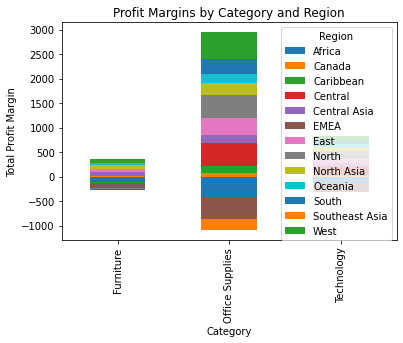

In [27]:
# Calculate profit margin for each sale
df["Profit Margin"] = (df["Profit"] / df["Sales"]).round(2)

# Group the data by category and region and sum the profit margins
profit_margin_df = df.groupby(["Category", "Region"])["Profit Margin"].sum().reset_index()

# Pivot the data to create a table with columns for each region
profit_margin_pivot = profit_margin_df.pivot(index="Category", columns="Region", values="Profit Margin").fillna(0)

# Create a stacked bar chart
plt.figure(figsize = (25, 25))
profit_margin_pivot.plot(kind="bar", stacked=True)
plt.title("Profit Margins by Category and Region")
plt.xlabel("Category")
plt.ylabel("Total Profit Margin")
plt.show()

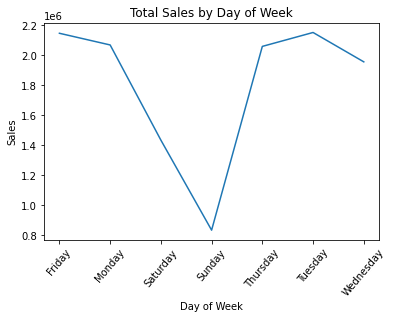

In [28]:
# Step 4: Add a new column 'Day of Week' to the dataframe
df['Day of Week'] = df['Order Date'].dt.day_name()
# Step 5: Group the dataframe by 'Day of Week', and aggregate the 'Sales' column
sales_by_day = df.groupby('Day of Week')['Sales'].sum()

# Step 6: Filter the data by category or region, if desired
# Example:
# sales_by_day = df[df['Category'] == 'Office Supplies'].groupby('Day of Week')['Sales'].sum()

# Step 7: Create a line chart using matplotlib
plt.plot(sales_by_day.index, sales_by_day.values)
plt.xticks(rotation = 50)
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


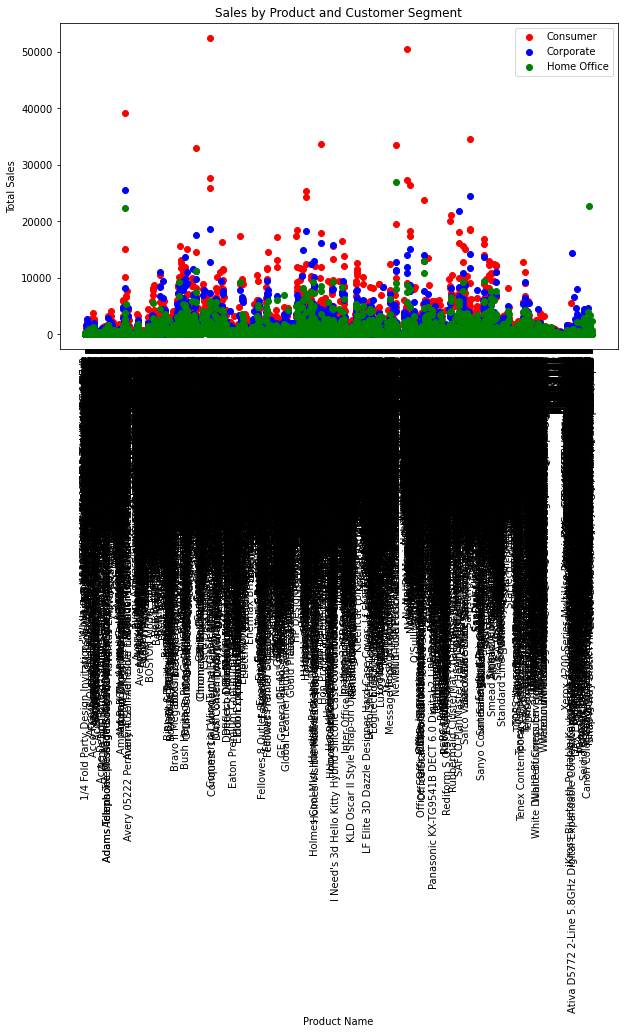

In [55]:
 #Aggregate the data by product and customer segment
grouped = df.groupby(['Product Name', 'Segment'], as_index=False)['Sales'].sum()

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
colors = {'Consumer': 'red', 'Corporate': 'blue', 'Home Office': 'green'}
for segment, color in colors.items():
    x = grouped[grouped['Segment'] == segment]['Product Name']
    y = grouped[grouped['Segment'] == segment]['Sales']
    ax.scatter(x, y, color=color, label=segment)
ax.legend()
ax.set_xlabel('Product Name')
ax.set_ylabel('Total Sales')
ax.set_title('Sales by Product and Customer Segment')
plt.xticks(rotation=90)
plt.show()

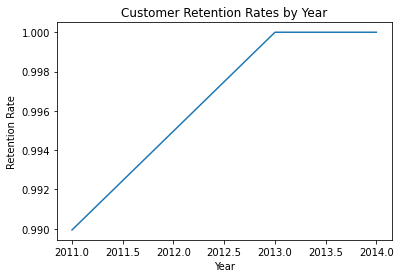

In [29]:
# convert the order date to a datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'])

# group the data by year and customer name
grouped = df.groupby([df['Order Date'].dt.year, 'Customer Name'])

# calculate the number of orders and number of repeat customers
orders = grouped.size()
repeat_customers = (orders > 1).groupby(level=0).sum()

# calculate the retention rate
retention_rate = repeat_customers / orders.groupby(level=0).size()

# plot the retention rate over time
retention_rate.plot()
plt.xlabel('Year')
plt.ylabel('Retention Rate')
plt.title('Customer Retention Rates by Year')
plt.show()

# Statistical measurement to better understand data

In [30]:
# mean
mean_sales = df['Sales'].mean()
#median
median_sales = df['Sales'].median()
#mode
mode_sales = df['Sales'].mode()[0]

print("MeanSales: ${:.2f}".format(mean_sales))
print("MedianSales: ${:.2f}".format(median_sales))
print("ModeSales: ${:.2f}".format(mode_sales))

MeanSales: $246.49
MedianSales: $85.05
ModeSales: $12.96


In [31]:
# Range of sales
sales_range = df['Sales'].max()-df['Sales'].min()
print("Sales range: ${:.2f}".format(sales_range))


Sales range: $22638.04


In [32]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
print("Total Sales: ${:.2f}".format(total_sales))
print("Total Profit: ${:.2f}".format(total_profit))

Total Sales: $12642501.91
Total Profit: $1467457.29


In [33]:
order_counts = df['Region'].value_counts()
print("Total order: ", order_counts)

Total order:  Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64


In [34]:
sales_profit_corr = df['Sales'].corr(df['Profit'])
print(sales_profit_corr)

0.4849181126194441


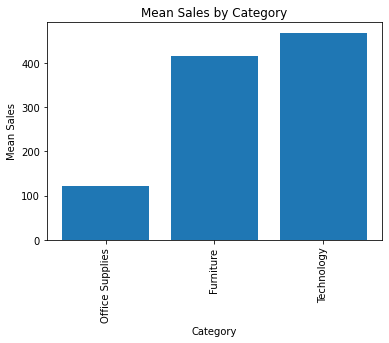

In [35]:
mean_sales_by_category = df.groupby('Category')['Sales'].mean().sort_values()

plt.bar(mean_sales_by_category.index, mean_sales_by_category.values)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Mean Sales')
plt.title('Mean Sales by Category')
plt.show()

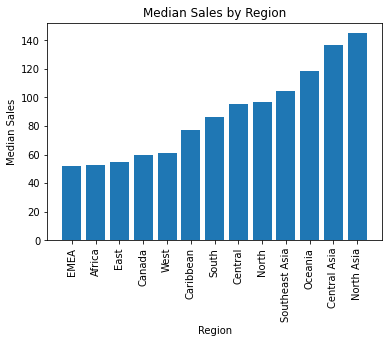

In [36]:
median_sales_by_region = df.groupby('Region')['Sales'].median().sort_values()

plt.bar(median_sales_by_region.index, median_sales_by_region.values)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Median Sales')
plt.title('Median Sales by Region')
plt.show()

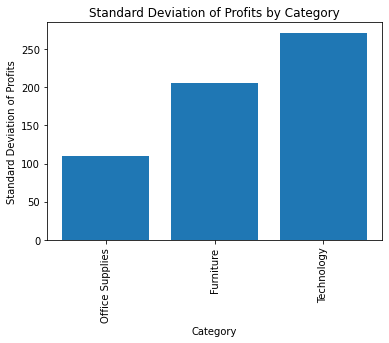

In [37]:
std_profits_by_category = df.groupby('Category')['Profit'].std().sort_values()

plt.bar(std_profits_by_category.index, std_profits_by_category.values)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Standard Deviation of Profits')
plt.title('Standard Deviation of Profits by Category')
plt.show()

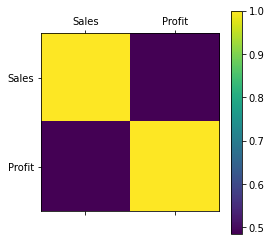

In [38]:
sales_and_profits = df[['Sales', 'Profit']]
corr = sales_and_profits.corr()

plt.matshow(corr)
plt.xticks(range(len(sales_and_profits.columns)), sales_and_profits.columns)
plt.yticks(range(len(sales_and_profits.columns)), sales_and_profits.columns)
plt.colorbar()
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Probability'>

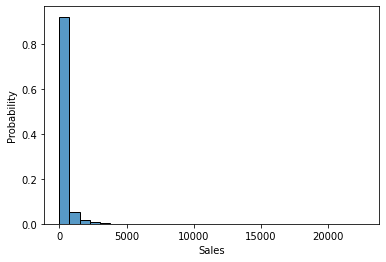

In [39]:
# Calculate the probability distribution of Sales
sales_prob = df['Sales'].value_counts(normalize=True)

# Plot the probability distribution using a histogram
sns.histplot(df, x="Sales", stat="probability", bins=30)

<AxesSubplot:>

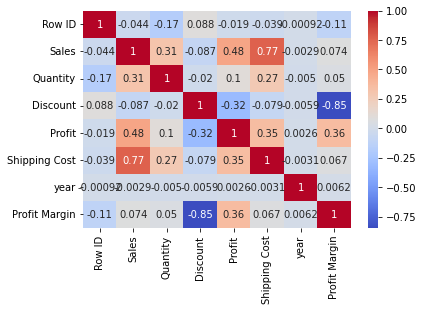

In [40]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='Sales', ylabel='Count'>

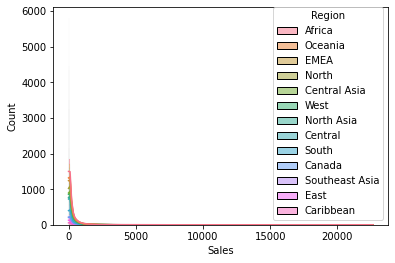

In [41]:
# Use Seaborn to create a histogram of sales by region
sns.histplot(data=df, x='Sales', hue='Region', kde=True, multiple='stack')

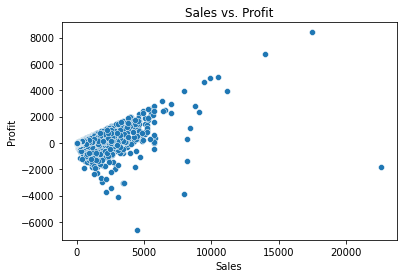

In [42]:
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')
plt.show()

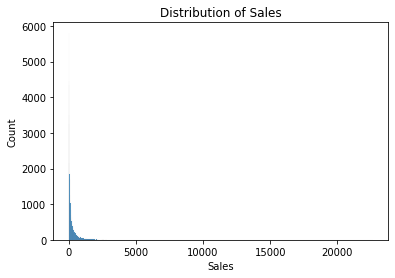

In [78]:
sns.histplot(x='Sales', data=df)
plt.title('Distribution of Sales')
plt.show()

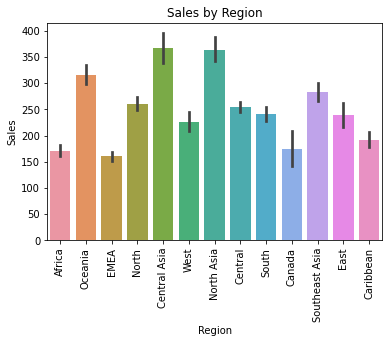

In [43]:
sns.barplot(x='Region', y='Sales', data=df)
plt.xticks(rotation = 90)
plt.title('Sales by Region')
plt.show()

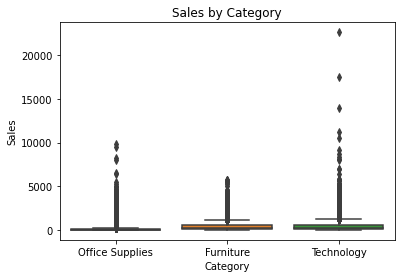

In [82]:
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.show()

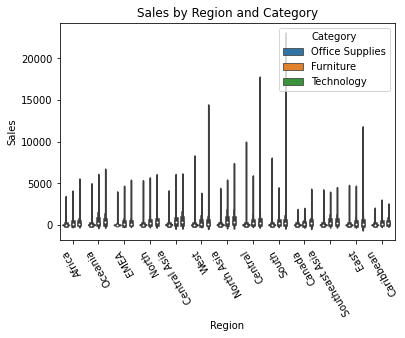

In [85]:
sns.violinplot(x='Region', y='Sales', hue='Category', data=df)
plt.xticks(rotation = 120)
plt.title('Sales by Region and Category')
plt.show()


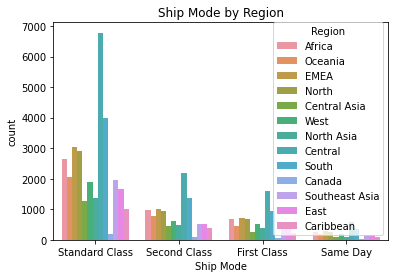

In [86]:
sns.countplot(x='Ship Mode', hue='Region', data=df)
plt.title('Ship Mode by Region')
plt.show()

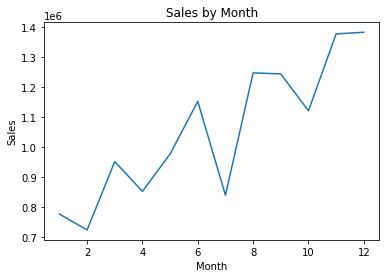

In [87]:
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
sales_by_month = df.groupby('Month')['Sales'].sum().reset_index()
sns.lineplot(x='Month', y='Sales', data=sales_by_month)
plt.title('Sales by Month')
plt.show()

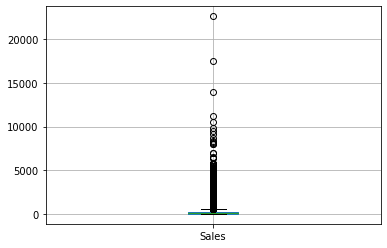

In [44]:
# Identify outliers using box plot
df.boxplot(column=['Sales'])

# Calculate upper and lower bounds
q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Remove outliers
df = df[(df['Sales'] > lower_bound) & (df['Sales'] < upper_bound)]

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
# Label encode the Category column
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# One-hot encode the Region column
df = pd.get_dummies(df, columns=['Region'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9848\1845053093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = le.fit_transform(df['Category'])


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
# Select the numerical columns to be scaled
numerical_columns = ['Sales', 'Quantity', 'Discount']

# Scale the numerical columns using MinMaxScaler
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# View the scaled dataframe
print(df.head())

   Row ID         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0   42433     AG-2011-2040 2011-01-01 2011-06-01  Standard Class    TB-11280   
1   22253    IN-2011-47883 2011-01-01 2011-08-01  Standard Class    JH-15985   
2   48883     HU-2011-1220 2011-01-01 2011-05-01    Second Class      AT-735   
3   11731  IT-2011-3647632 2011-01-01 2011-05-01    Second Class    EM-14140   
4   22255    IN-2011-47883 2011-01-01 2011-08-01  Standard Class    JH-15985   

     Customer Name      Segment         City            State  ...  \
0  Toby Braunhardt     Consumer  Constantine      Constantine  ...   
1      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   
2    Annie Thurman     Consumer     Budapest         Budapest  ...   
3     Eugene Moren  Home Office    Stockholm        Stockholm  ...   
4      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   

  Region_Central Region_Central Asia Region_EMEA  Region_East Region_North  \
0              0    

In [51]:
# Create a new feature "profit" by subtracting the cost from the sale price
df['profit'] = df['Sales'] - df['Profit']

# Display the updated dataset
print(df.head())

   Row ID         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0   42433     AG-2011-2040 2011-01-01 2011-06-01  Standard Class    TB-11280   
1   22253    IN-2011-47883 2011-01-01 2011-08-01  Standard Class    JH-15985   
2   48883     HU-2011-1220 2011-01-01 2011-05-01    Second Class      AT-735   
3   11731  IT-2011-3647632 2011-01-01 2011-05-01    Second Class    EM-14140   
4   22255    IN-2011-47883 2011-01-01 2011-08-01  Standard Class    JH-15985   

     Customer Name      Segment         City            State  ...  \
0  Toby Braunhardt     Consumer  Constantine      Constantine  ...   
1      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   
2    Annie Thurman     Consumer     Budapest         Budapest  ...   
3     Eugene Moren  Home Office    Stockholm        Stockholm  ...   
4      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   

  Region_Central Asia Region_EMEA Region_East  Region_North Region_North Asia  \
0                

In [52]:
from sklearn.model_selection import train_test_split

X = df.drop('Sales', axis=1)  # Features
y = df['Sales']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)